# Code Coverage Evaluation for Unit Tests

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

## Read in coverage reports into seperate dataframes

In [4]:
# read in all csv in /coverage_reports in separate dataframes
df_list = []
for file in os.listdir('coverage_reports'):
    if file.endswith('.csv') and 'sample' not in file:
        df = pd.read_csv('coverage_reports/' + file)
        df["File"] = file[:-4]
        df_list.append(df)

## Create a dataframe with the aggregated coverage results

In [5]:
columns = ['File', 'Instruction_Total', 'Instruction', 'Branch_Total', 'Branch', 'Line_Total', 'Line', 'Complexity_Total', 'Complexity', 'Method_Total', 'Method']
df_agg = pd.DataFrame(columns=columns)

for df in df_list:
    df_agg = df_agg._append({'File': df['File'][0],
                             'Instruction_Total': df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum(),
                            'Instruction': df['INSTRUCTION_COVERED'].sum() / (df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum()),
                            'Branch_Total': df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum(),
                            'Branch': df['BRANCH_COVERED'].sum() / (df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum()),
                            'Line_Total': df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum(),
                            'Line': df['LINE_COVERED'].sum() / (df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum()),
                            'Complexity_Total': df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum(),
                            'Complexity': df['COMPLEXITY_COVERED'].sum() / (df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum()),
                            'Method_Total': df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum(),
                            'Method': df['METHOD_COVERED'].sum() / (df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum())},
                           ignore_index=True)

df_agg


/var/folders/0g/czf1jpd15jx1w6btr565xw180000gn/T/ipykernel_65572/1030606437.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_agg = df_agg._append({'File': df['File'][0],


,File,Instruction_Total,Instruction,Branch_Total,Branch,Line_Total,Line,Complexity_Total,Complexity,Method_Total,Method
0,coverage_report_20231027_222616,5037,0.219972,724,0.142265,1207,0.262635,654,0.223242,288,0.364583
1,coverage_report_20231023_214133,5037,0.165376,724,0.131215,1207,0.196355,654,0.177370,288,0.250000
2,coverage_report_20231025_121248,5037,0.330355,724,0.236188,1207,0.342999,654,0.250765,288,0.392361
3,coverage_report_20231025_224954,5037,0.357157,724,0.252762,1207,0.394366,654,0.308869,288,0.517361
4,coverage_report_20231028_032631,5037,0.316061,724,0.212707,1207,0.328915,654,0.244648,288,0.427083
5,coverage_report_20231025_100630,5037,0.229700,724,0.167127,1207,0.239437,654,0.201835,288,0.309028
6,coverage_report_20231027_212614,5037,0.234663,724,0.154696,1207,0.245236,654,0.198777,288,0.322917
7,coverage_report_20231024_165833,5037,0.245980,724,0.153315,1207,0.283347,654,0.220183,288,0.388889
8,coverage_report_20231024_082502,5037,0.151082,724,0.109116,1207,0.171500,654,0.168196,288,0.267361
9,coverage_report_20231028_012625,5037,0.202899,724,0.128453,1207,0.214582,654,0.177370,288,0.291667


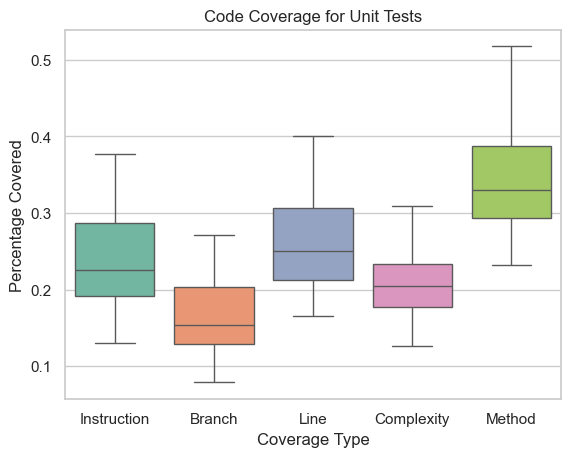

In [6]:
# plot the results using a boxplot
sns.set_theme(style="whitegrid")
sns.boxplot(data=df_agg[['Instruction', 'Branch', 'Line', 'Complexity', 'Method']], palette="Set2")
plt.title('Code Coverage for Unit Tests')
plt.ylabel('Percentage Covered')
plt.xlabel('Coverage Type')
plt.show()

In [7]:
# Calculate the mean and standard deviation for each coverage type
df_agg[['Instruction', 'Branch', 'Line', 'Complexity', 'Method']].describe()

,Instruction,Branch,Line,Complexity,Method
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.237125,0.162661,0.260922,0.209837,0.343866
std,0.063540,0.051772,0.062677,0.041890,0.066543
min,0.130038,0.078729,0.165700,0.126911,0.232639
25%,0.190987,0.128798,0.212717,0.177370,0.293403
50%,0.226027,0.154006,0.250207,0.204893,0.329861
75%,0.286927,0.202693,0.306131,0.233945,0.387153
max,0.377209,0.270718,0.400166,0.308869,0.517361


## Evaluate coverage from multiple test suites combined

In [10]:
# read in csv
df = pd.read_csv('coverage_reports/coverage_report_sample_30.csv')

In [12]:
columns = ['Instruction_Total', 'Instruction', 'Branch_Total', 'Branch', 'Line_Total', 'Line', 'Complexity_Total', 'Complexity', 'Method_Total', 'Method']
df_agg = pd.DataFrame(columns=columns)


df_agg = df_agg._append({'Instruction_Total': df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum(),
                        'Instruction': df['INSTRUCTION_COVERED'].sum() / (df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum()),
                        'Branch_Total': df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum(),
                        'Branch': df['BRANCH_COVERED'].sum() / (df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum()),
                        'Line_Total': df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum(),
                        'Line': df['LINE_COVERED'].sum() / (df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum()),
                        'Complexity_Total': df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum(),
                        'Complexity': df['COMPLEXITY_COVERED'].sum() / (df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum()),
                        'Method_Total': df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum(),
                        'Method': df['METHOD_COVERED'].sum() / (df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum())},
                       ignore_index=True)

df_agg

/var/folders/0g/czf1jpd15jx1w6btr565xw180000gn/T/ipykernel_65572/1371186788.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_agg = df_agg._append({'Instruction_Total': df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum(),


,Instruction_Total,Instruction,Branch_Total,Branch,Line_Total,Line,Complexity_Total,Complexity,Method_Total,Method
0,5037.0,0.67977,724.0,0.540055,1207.0,0.71251,654.0,0.620795,288.0,0.868056


## Evaluate coverage from Evosuite generated tests

In [13]:
# read in csv
df = pd.read_csv('coverage_reports_evosuite/coverage_report_evosuite.csv')

columns = ['Instruction_Total', 'Instruction', 'Branch_Total', 'Branch', 'Line_Total', 'Line', 'Complexity_Total', 'Complexity', 'Method_Total', 'Method']
df_agg = pd.DataFrame(columns=columns)


df_agg = df_agg._append({'Instruction_Total': df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum(),
                        'Instruction': df['INSTRUCTION_COVERED'].sum() / (df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum()),
                        'Branch_Total': df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum(),
                        'Branch': df['BRANCH_COVERED'].sum() / (df['BRANCH_MISSED'].sum() + df['BRANCH_COVERED'].sum()),
                        'Line_Total': df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum(),
                        'Line': df['LINE_COVERED'].sum() / (df['LINE_MISSED'].sum() + df['LINE_COVERED'].sum()),
                        'Complexity_Total': df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum(),
                        'Complexity': df['COMPLEXITY_COVERED'].sum() / (df['COMPLEXITY_MISSED'].sum() + df['COMPLEXITY_COVERED'].sum()),
                        'Method_Total': df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum(),
                        'Method': df['METHOD_COVERED'].sum() / (df['METHOD_MISSED'].sum() + df['METHOD_COVERED'].sum())},
                       ignore_index=True)

df_agg

/var/folders/0g/czf1jpd15jx1w6btr565xw180000gn/T/ipykernel_65572/3972128308.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_agg = df_agg._append({'Instruction_Total': df['INSTRUCTION_MISSED'].sum() + df['INSTRUCTION_COVERED'].sum(),


,Instruction_Total,Instruction,Branch_Total,Branch,Line_Total,Line,Complexity_Total,Complexity,Method_Total,Method
0,5037.0,0.881279,724.0,0.798343,1207.0,0.896437,654.0,0.836391,288.0,0.986111


## Aggregated coverage results for the different test suites

| Test Suite                  | Instruction | Branch | Line | Complexity | Method |
|-----------------------------| --- | --- | --- | --- |
| CodeLlama Individual (mean) | 23.71 | 16.27 | 26.09 | 20.98 | 34.39 |
| CodeLlama All Tests         | 67.98 | 54.01 | 71.25 | 62.08 | 86.80 |
| Evosuite                    | 88.13 | 79.83 | 89.64 | 83.54 | 98.61 |
